# **Function-Transformer**

### **| Log Transform | Reciprocal Transform | Square Root**

In [7]:
import pandas as pd
import numpy as np
import scipy.stats as stats # QQ Plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [9]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [10]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
df.isnull().sum() # identify the missing values

,0
Survived,0
Age,177
Fare,0


In [12]:
df['Age'].fillna(df['Age'].mean(),inplace=True) # filling the value with mean

/tmp/ipython-input-12-413672542.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True) # filling the value with mean


In [13]:

df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [14]:

X = df.iloc[:,1:3] # age and fare
y = df.iloc[:,0] # survived

In [15]:
# applying the train_test_split functions
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

/tmp/ipython-input-16-3696027128.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


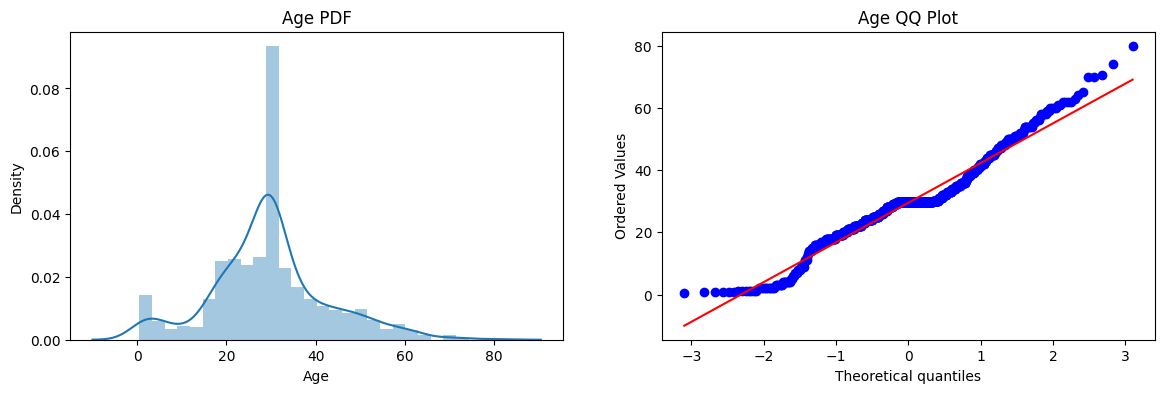

In [16]:
# PDF graph
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')


# QQ Plot graph
plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

/tmp/ipython-input-17-2391956470.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


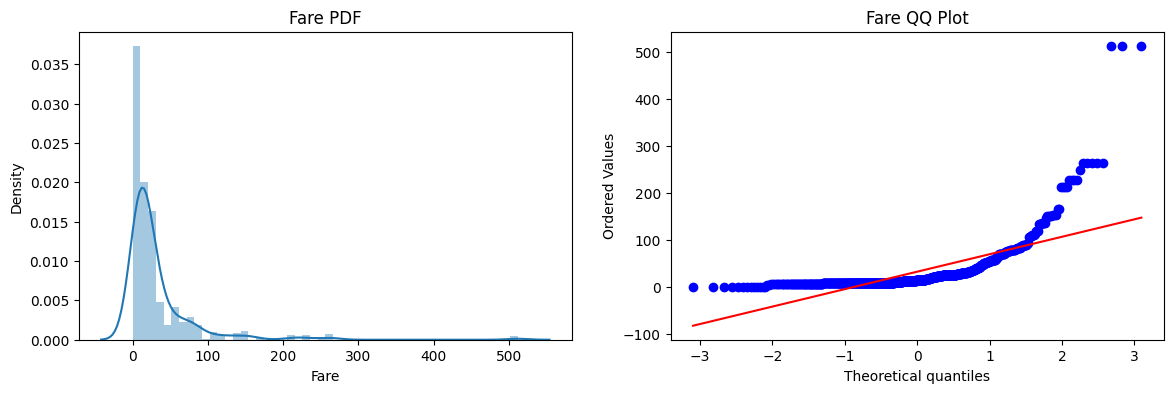

In [17]:
# PDF graph
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

# QQ Plot graph
plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [18]:

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [19]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [20]:
# before Accuracy
clf.fit(X_train_imputed, y_train)
clf2.fit(X_train_imputed, y_train)

y_pred = clf.predict(X_test_imputed)
y_pred1 = clf2.predict(X_test_imputed)

print("Accuracy LR",accuracy_score(y_test,y_pred)*100)
print("Accuracy DT",accuracy_score(y_test,y_pred1)*100)

Accuracy LR 64.80446927374301
Accuracy DT 67.0391061452514


In [21]:
# applying log transform which is used for skew data
trf = FunctionTransformer(func=np.log1p)

In [22]:
X_train_transformed = trf.fit_transform(X_train_imputed)
X_test_transformed = trf.transform(X_test_imputed)

In [23]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

print("Accuracy LR",accuracy_score(y_test,y_pred)*100)
print("Accuracy DT",accuracy_score(y_test,y_pred1)*100)

Accuracy LR 68.15642458100558
Accuracy DT 67.59776536312849


In [24]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

# 2. Run cross-validation (now handles NaN properly)
lr_scores = cross_val_score(clf, X, y, scoring='accuracy', cv=10)
dt_scores = cross_val_score(clf2, X, y, scoring='accuracy', cv=10)

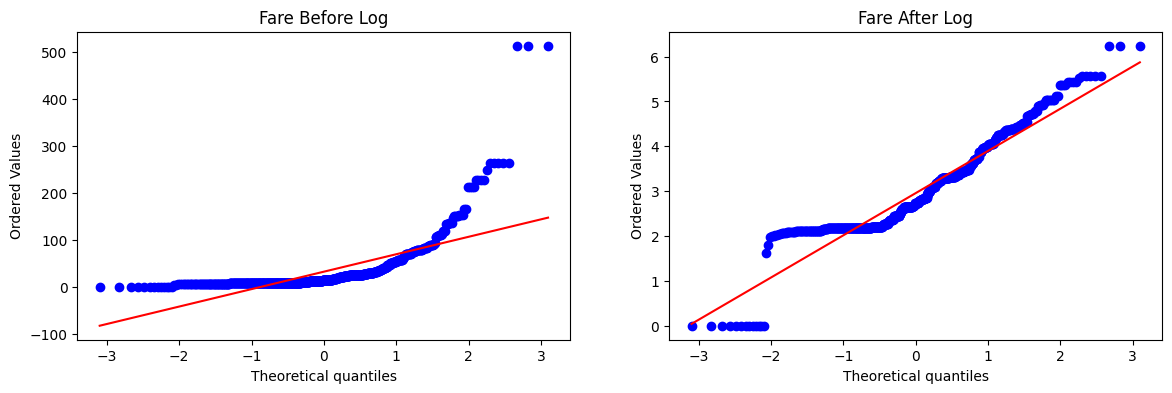

In [25]:
import scipy.stats as stats
plt.figure(figsize=(14, 4))

# Before log transform (original DataFrame)
plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

# After log transform (NumPy array - access by column index)
plt.subplot(122)
stats.probplot(X_train_transformed[:, X_train.columns.get_loc('Fare')], dist="norm", plot=plt)  # Use column index
plt.title('Fare After Log')

plt.show()

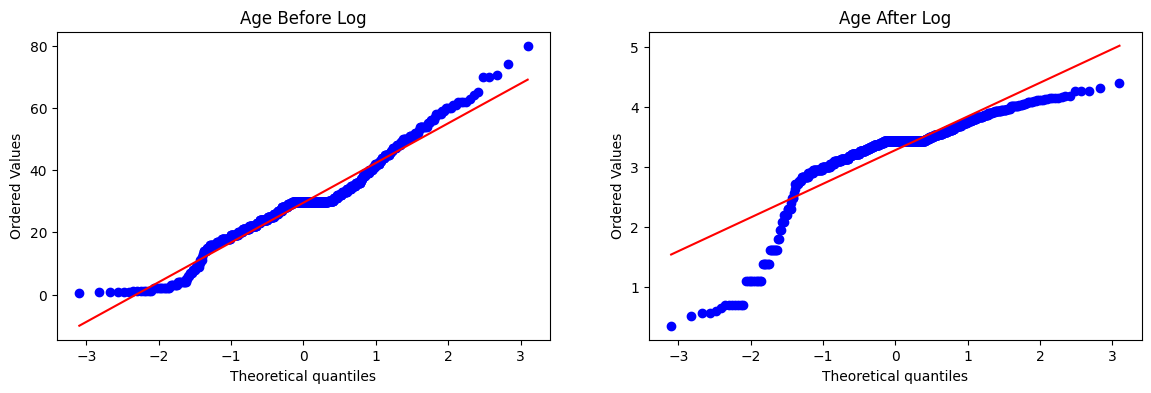

In [26]:

plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed[:, X_train.columns.get_loc('Age')], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

### **We will apply Log Transform to Fare only**

Decision Tree Doesnt get affected from transformer

In [27]:
# Column Transformer
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [28]:
# Step 2: Train models
clf = LogisticRegression(max_iter=1000)  # Increase max_iter for convergence
clf2 = DecisionTreeClassifier()

clf.fit(X_train_imputed, y_train)
clf2.fit(X_train_imputed, y_train)

# Step 3: Predict
y_pred = clf.predict(X_test_imputed)
y_pred2 = clf2.predict(X_test_imputed)

# Step 4: Evaluate
print("Accuracy LR:", accuracy_score(y_test, y_pred))
print("Accuracy DT:", accuracy_score(y_test, y_pred2))

Accuracy LR: 0.6480446927374302
Accuracy DT: 0.6703910614525139


In [29]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.664804469273743


In [30]:

def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6431335830212235


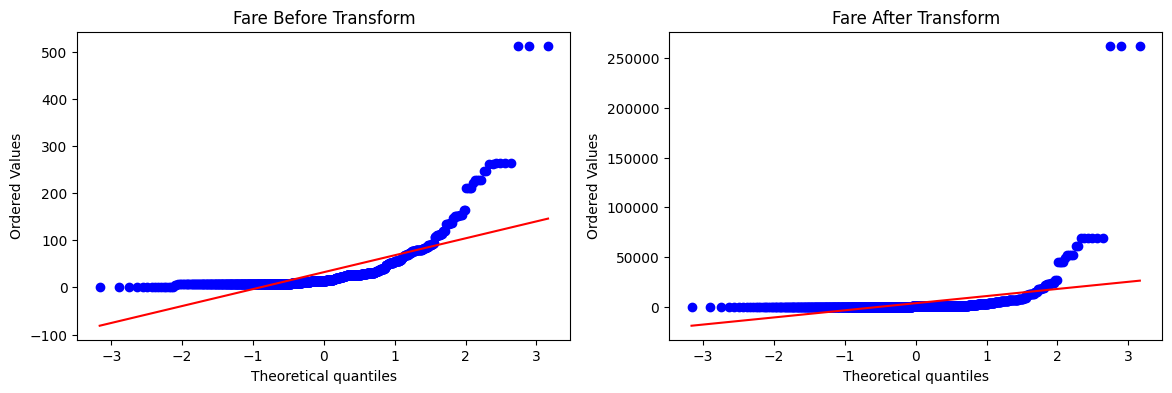

In [34]:
apply_transform(lambda x: x**2)

Accuracy 0.6589013732833957


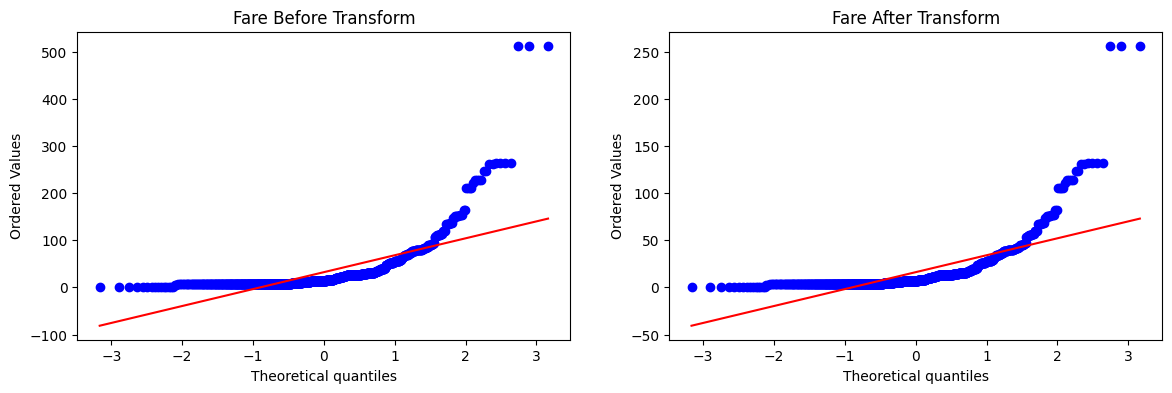

In [31]:
apply_transform(lambda x: x**1/2)

Accuracy 0.61729088639201


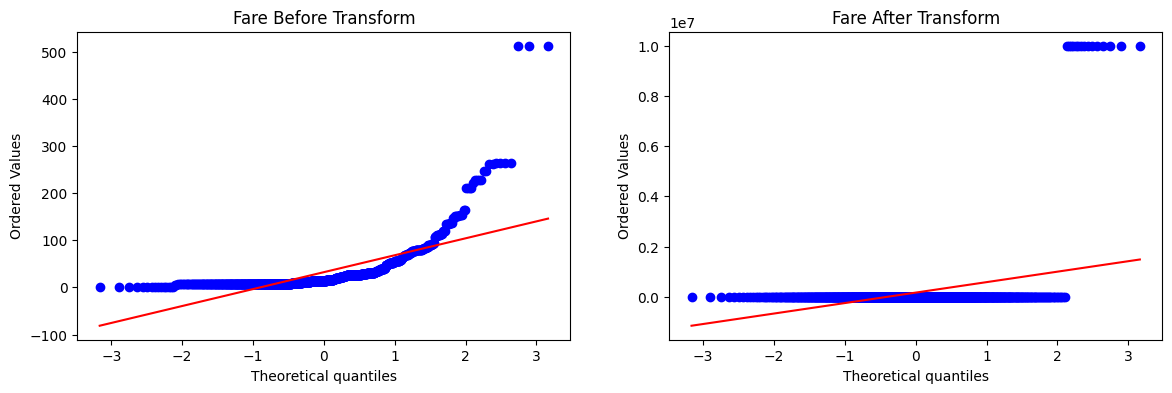

In [32]:
apply_transform(lambda x: 1/(x+0.0000001))

Accuracy 0.6195131086142323


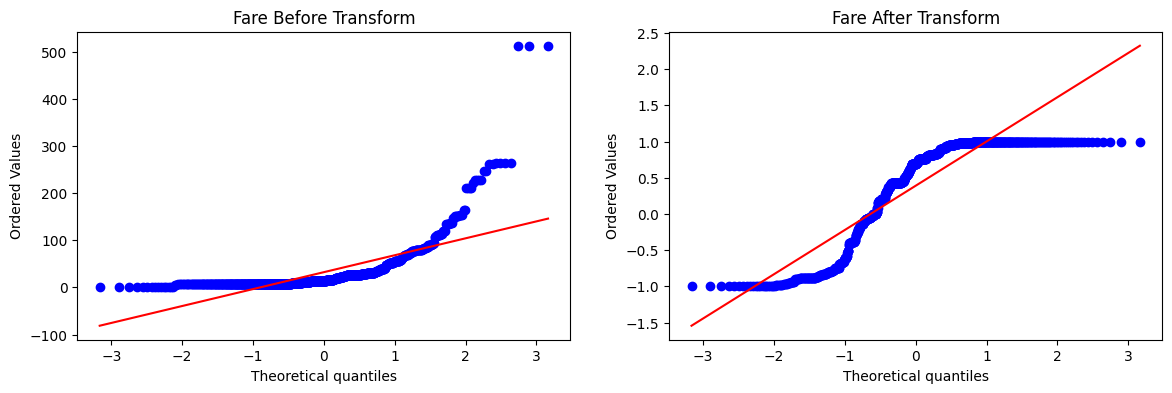

In [33]:
apply_transform(np.sin)

Accuracy 0.6184144818976279


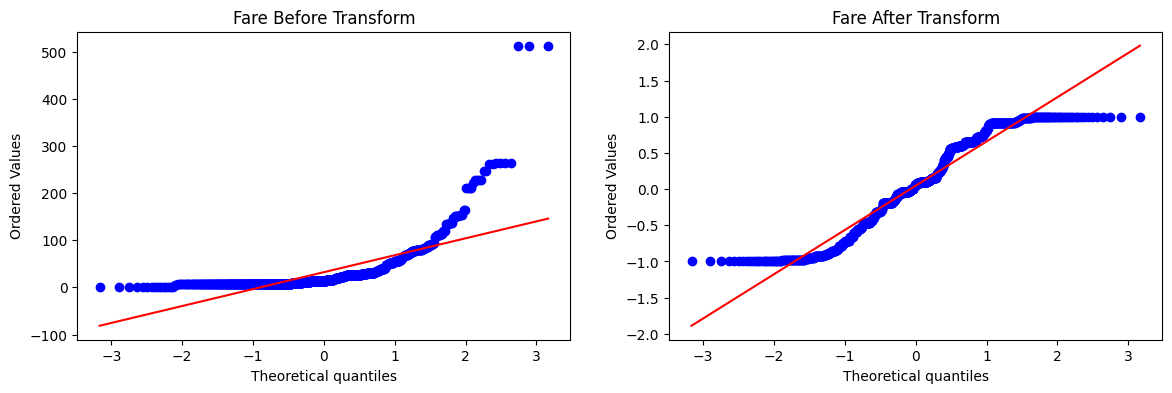

In [35]:
apply_transform(np.cos)